# Data Import & Preparation

In [51]:
# Import Dependencies
import pandas as pd
import json
import glob

In [80]:
# Convert JSONs to DataFrames
df_fall_21 = pd.read_json('fall2021.json')
df_spring_22 = pd.read_json('spring2022.json')
df_fall_22 = pd.read_json('fall2022.json')
df_spring_23 = pd.read_json('spring2023.json')
df_fall_23 = pd.read_json('fall2023.json')

In [81]:
# Combine DataFrames
combined_df = pd.concat([df_fall_21, df_spring_22, df_fall_22, df_spring_23, df_fall_23], ignore_index=True)

In [82]:
combined_df

,status,applicationDate,decisionDate,education,recommendations,experience,statementOfPurpose,comments,toeflScore,gre,moocs,relevantCreditCourses
0,Accepted,01/19/2021,04/23/2021,"{'institution': 'Big State School', 'degrees':...",0,"Unrelated(Active Duty Air Force), open source ...",Y,"All A's for prereq's, including the ones on th...",NaN,NaN,NaN,NaN
1,Accepted,12/28/2020,04/08/2021,"{'institution': 'University of Minnesota', 'de...",1,"3 years as machine learning engineer, 3 years ...",Y,I also have publications and thesis. Generally...,NaN,NaN,NaN,NaN
2,Rejected,01/12/2021,05/10/2022,"{'institution': 'University of Illinois', 'deg...",1,"3 years, manufacturing, Python & SQL",Y,"Got rejected, but I've already accepted an adm...",NaN,NaN,NaN,NaN
3,Accepted,02/02/2021,04/08/2021,{'degrees': [{'institution': 'BS Health Scienc...,3,5 years in research in academia which involved...,Y,Nervous and will need to do a lot of studying ...,NaN,NaN,NaN,NaN
4,Accepted,03/18/2021,04/23/2021,"{'institution': 'UT Austin', 'degrees': [{'deg...",3,No relevant experience.,Y,My Weakness - I know my 3.92 GPA seems like a ...,NaN,NaN,NaN,NaN
5,Accepted,01/29/2021,04/08/2021,{'degrees': [{'institution': 'Korea Military A...,3,Unrelated(Active Duty Korean Army). Applied py...,Y,NaN,"{'total': 105, 'listening': 29, 'reading': 29,...",NaN,NaN,NaN
6,Accepted,03/19/2021,06/01/2021,"{'institution': 'UT Austin', 'degrees': [{'deg...",3,1 month internship in SparkCognition as an Eng...,Y,My GPA is kind of ~meh~ due to personal issues...,NaN,"{'quantitative': 169, 'verbal': 154, 'writing'...",NaN,NaN
7,Accepted,03/29/2021,05/10/2021,"{'institution': 'Big State School', 'degrees':...",2,4 years in application engineering and tech sa...,Y,Humbled last Fall when I applied for Spring 20...,NaN,NaN,NaN,NaN
8,Accepted,08/31/2020,10/23/2020,"{'degrees': [{'institution': 'SUNY Oswego', 'd...",2,NaN,Y,I'm noticing a trend of people that almost see...,NaN,"{'quantitative': 160, 'verbal': 161, 'writing'...",NaN,NaN
9,Accepted,02/16/2021,04/08/2021,{'degrees': [{'institution': 'Queen's Universi...,0,3.5 years of data analysis and analytics in bi...,Y,I believe that my SOP and professional experie...,NaN,NaN,NaN,NaN


# Preliminary Data Exploration & Visualization

## Summary Statistics

In [89]:
# Import even more Dependencies
import matplotlib.pyplot as plt
import seaborn as sns

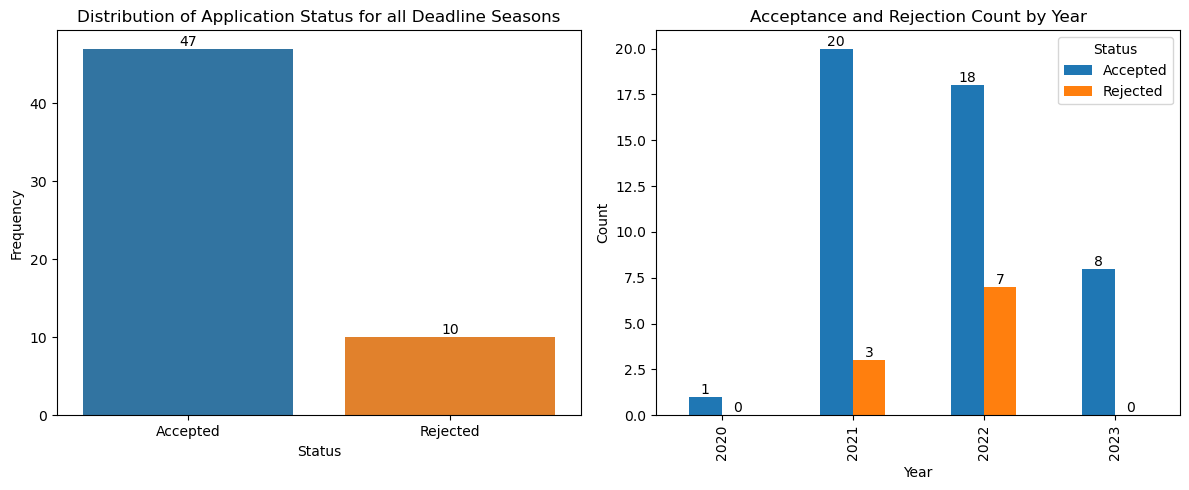

In [90]:
# Create a grid of subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the overall histogram in the first subplot
sns.countplot(data=combined_df, x='status', ax=axes[0])
axes[0].set_xlabel('Status')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Application Status for all Deadline Seasons')

# Add quantity labels above each bar in the first subplot
for p in axes[0].patches:
    axes[0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Group the data by 'year' and 'status' columns
grouped_data = combined_df.groupby(['year', 'status']).size().unstack()

# Plot the grouped histogram in the second subplot
grouped_data.plot(kind='bar', ax=axes[1])
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Count')
axes[1].set_title('Acceptance and Rejection Count by Year')
axes[1].legend(title='Status')

# Add quantity labels above each bar in the second subplot
for p in axes[1].patches:
    axes[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()
